<a href="https://colab.research.google.com/github/meriemdouider1/tp-deep-learning/blob/main/TP%201ANN%20(Q1-%3EQ4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANN_WITH_KERAS**

# Setup

-> Firstly, lets import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [ ]:
# Common imports
import numpy as np
import os

In [ ]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [ ]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


**Building an Image Classifier**

First : import TensorFlow and Keras.

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.3.0'


we start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:



In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


The training set contains 60,000 grayscale images, each 28x28 pixels and Each pixel intensity is represented as a byte (0 to 255)::

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

The testing set contains 10000 grayscale images, each 28x28 pixels:

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the **0-1** range and convert them to floats, by dividing by **255**.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

*The validation set contains 5,000 images*

In [ ]:
X_valid.shape

(5000, 28, 28)

*The train set contains 55,000 images*

In [ ]:
X_train.shape

(55000, 28, 28)

*The test set contains 10,000 images*


In [ ]:
X_test.shape

(10000, 28, 28)

You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:


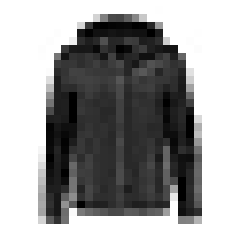

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

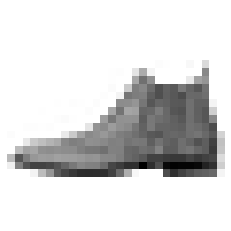

In [ ]:
plt.imshow(X_test[0], cmap="binary")
plt.axis('off')
plt.show()

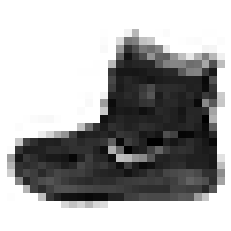

In [ ]:
plt.imshow(X_valid[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [ ]:
class_names[y_train[0]]

'Coat'


Let's take a look at a sample of the images in the dataset:

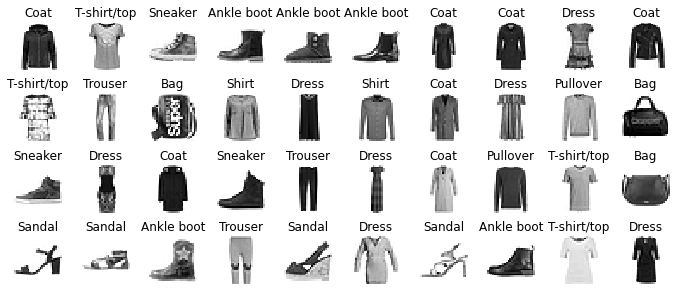

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

**Construct a Model**

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
keras.backend.clear_session()
np.random.seed(42)#?

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[-0.0651096 ,  0.0325868 , -0.04220156, ...,  0.00991491,
        -0.03898571,  0.02701436],
       [ 0.06715454, -0.01801533, -0.06622749, ..., -0.04096749,
         0.0042126 ,  0.02553277],
       [ 0.01163381,  0.002472  ,  0.06352009, ...,  0.00128819,
         0.00520138, -0.0269979 ],
       ...,
       [ 0.01814058, -0.04530952,  0.05976786, ...,  0.03086578,
        -0.05118783, -0.05438375],
       [ 0.06633453,  0.02748101, -0.01264757, ..., -0.06176372,
        -0.05795301,  0.0082702 ],
       [ 0.00189321,  0.07219626, -0.06306353, ...,  0.04464698,
        -0.06819338,  0.07308213]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

Here you can chose the loss function, the optimizer, the performance metric, etc.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7067 - accuracy: 0.7709 - val_loss: 0.5268 - val_accuracy: 0.8202
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4858 - accuracy: 0.8300 - val_loss: 0.4476 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4394 - accuracy: 0.8452 - val_loss: 0.4265 - val_accuracy: 0.8550
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4125 - accuracy: 0.8537 - val_loss: 0.4170 - val_accuracy: 0.8544
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3920 - accuracy: 0.8609 - val_loss: 0.3746 - val_accuracy: 0.8704
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3755 - accuracy: 0.8672 - val_loss: 0.3750 - val_accuracy: 0.8704
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3625 - accuracy: 0.8711 - val_loss: 0.3995 - val_accuracy:

In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plot learning Curves**

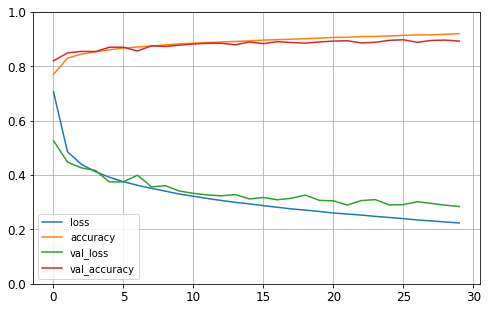

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8820


[0.32758739590644836, 0.8820000290870667]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(5)

array([[0.0000e+00, 0.0000e+00, 1.0000e-05, 0.0000e+00, 0.0000e+00,
        3.5000e-03, 0.0000e+00, 1.0600e-02, 2.8000e-04, 9.8560e-01],
       [1.0000e-05, 0.0000e+00, 9.9733e-01, 0.0000e+00, 2.4900e-03,
        0.0000e+00, 1.7000e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [2.0000e-05, 9.9998e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
      dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

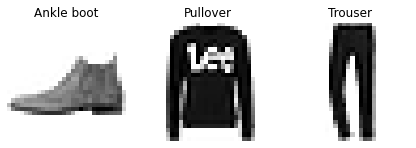

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


# **EXERCICE :** 

# **1) Plot Learning curves when using different optimizers**



https://keras.io/api/optimizers/




*1.1) optimizer:Nadame*

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Nadam",
              metrics=["accuracy"])

In [ ]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3576 - accuracy: 0.8692 - val_loss: 0.3855 - val_accuracy: 0.8516
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3163 - accuracy: 0.8846 - val_loss: 0.3271 - val_accuracy: 0.8802
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2928 - accuracy: 0.8913 - val_loss: 0.3169 - val_accuracy: 0.8854
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2782 - accuracy: 0.8968 - val_loss: 0.3135 - val_accuracy: 0.8838
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2621 - accuracy: 0.9014 - val_loss: 0.3005 - val_accuracy: 0.8872
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2501 - accuracy: 0.9069 - val_loss: 0.3307 - val_accuracy: 0.8874
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2407 - accuracy: 0.9100 - val_loss: 0.3261 - val_ac

In [ ]:
history1.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

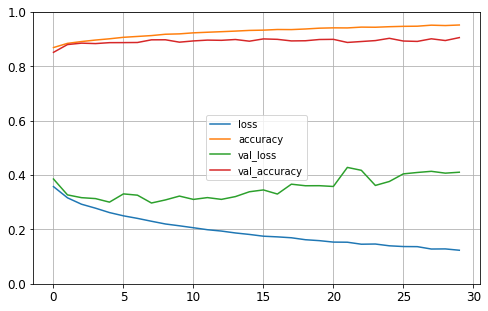

In [ ]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.8943


[0.4580421447753906, 0.8942999839782715]

*1.2) optimizer:RMSprop*


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [ ]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1298 - accuracy: 0.9517 - val_loss: 0.5834 - val_accuracy: 0.8902
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1394 - accuracy: 0.9496 - val_loss: 0.5512 - val_accuracy: 0.8962
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1417 - accuracy: 0.9488 - val_loss: 0.7313 - val_accuracy: 0.8948
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1520 - accuracy: 0.9470 - val_loss: 0.7675 - val_accuracy: 0.8890
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1627 - accuracy: 0.9454 - val_loss: 0.6919 - val_accuracy: 0.8988
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1646 - accuracy: 0.9450 - val_loss: 0.8472 - val_accuracy: 0.8906
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1665 - accuracy: 0.9453 - val_loss: 0.8277 - val_accuracy:

In [ ]:

history2.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

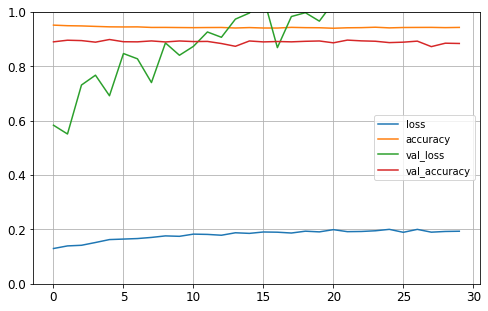

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 1.1962 - accuracy: 0.8802


[1.1962229013442993, 0.8802000284194946]


*1.3) optimizer:momentum*



In [ ]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history3 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 8.2447 - accuracy: 0.7731 - val_loss: 0.5316 - val_accuracy: 0.8068
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4459 - accuracy: 0.8402 - val_loss: 0.4916 - val_accuracy: 0.8348
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3949 - accuracy: 0.8578 - val_loss: 0.4348 - val_accuracy: 0.8646
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3592 - accuracy: 0.8723 - val_loss: 0.3961 - val_accuracy: 0.8744
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3305 - accuracy: 0.8811 - val_loss: 0.3983 - val_accuracy: 0.8728
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3121 - accuracy: 0.8872 - val_loss: 0.4076 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2951 - accuracy: 0.8929 - val_loss: 0.3990 - val_accuracy:

In [ ]:
history3.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

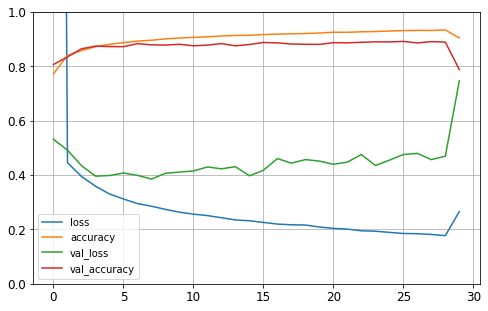

In [ ]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7915 - accuracy: 0.7711


[0.7914562821388245, 0.7710999846458435]

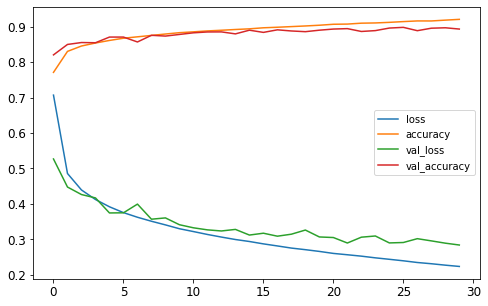

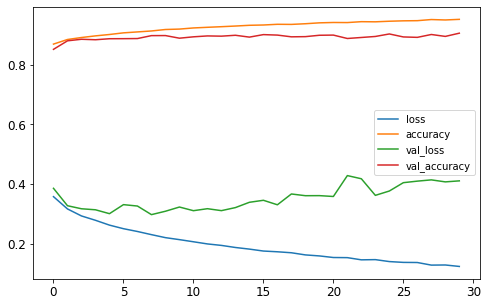

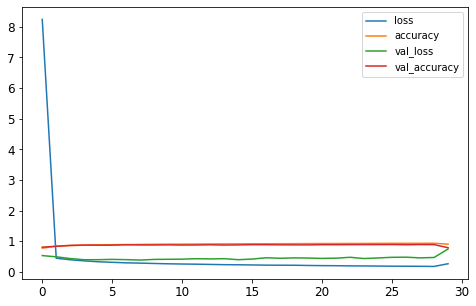

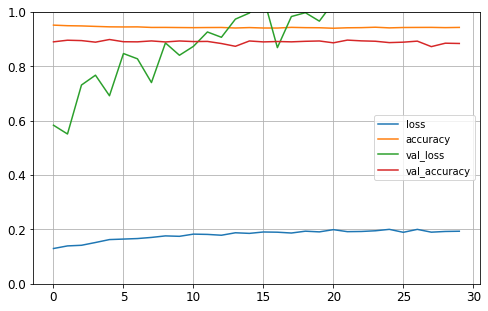

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
pd.DataFrame(history1.history).plot(figsize=(8, 5))
pd.DataFrame(history3.history).plot(figsize=(8, 5))
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# **2) Plot Learning curves when using different batch size**

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

*2.1) batch-size:12*

In [ ]:
history4 = model.fit(X_train, y_train, batch_size=12, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
4584/4584 [==============================] - 11s 2ms/step - loss: 0.3508 - accuracy: 0.8813 - val_loss: 0.4832 - val_accuracy: 0.8642
Epoch 2/30
4584/4584 [==============================] - 11s 2ms/step - loss: 0.2651 - accuracy: 0.9060 - val_loss: 0.4220 - val_accuracy: 0.8788
Epoch 3/30
4584/4584 [==============================] - 11s 2ms/step - loss: 0.2349 - accuracy: 0.9151 - val_loss: 0.4377 - val_accuracy: 0.8812
Epoch 4/30
4584/4584 [==============================] - 11s 2ms/step - loss: 0.2148 - accuracy: 0.9237 - val_loss: 0.4624 - val_accuracy: 0.8786
Epoch 5/30
4584/4584 [==============================] - 11s 2ms/step - loss: 0.2006 - accuracy: 0.9275 - val_loss: 0.4647 - val_accuracy: 0.8860
Epoch 6/30
4584/4584 [==============================] - 11s 2ms/step - loss: 0.1932 - accuracy: 0.9303 - val_loss: 0.4520 - val_accuracy: 0.8872
Epoch 7/30
4584/4584 [==============================] - 11s 2ms/step - loss: 0.1851 - accuracy: 0.9331 - val_loss: 0.4786 - val_ac

In [ ]:
history4.params

{'epochs': 30, 'steps': 4584, 'verbose': 1}

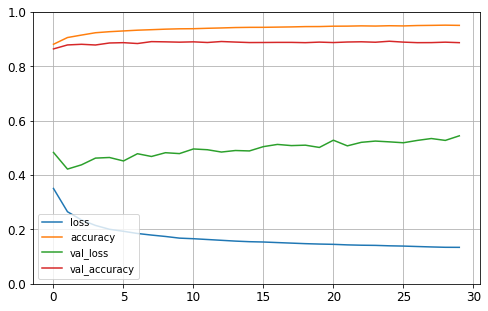

In [ ]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5869 - accuracy: 0.8821


[0.5868515372276306, 0.882099986076355]

*2.2) batch-size:18*

In [ ]:
history5 = model.fit(X_train, y_train, batch_size=18, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
3056/3056 [==============================] - 11s 4ms/step - loss: 0.1290 - accuracy: 0.9541 - val_loss: 0.5313 - val_accuracy: 0.8904
Epoch 2/30
3056/3056 [==============================] - 7s 2ms/step - loss: 0.1279 - accuracy: 0.9542 - val_loss: 0.5563 - val_accuracy: 0.8896
Epoch 3/30
3056/3056 [==============================] - 8s 3ms/step - loss: 0.1272 - accuracy: 0.9548 - val_loss: 0.5497 - val_accuracy: 0.8898
Epoch 4/30
3056/3056 [==============================] - 8s 3ms/step - loss: 0.1265 - accuracy: 0.9549 - val_loss: 0.5562 - val_accuracy: 0.8866
Epoch 5/30
3056/3056 [==============================] - 8s 3ms/step - loss: 0.1260 - accuracy: 0.9544 - val_loss: 0.5511 - val_accuracy: 0.8896
Epoch 6/30
3056/3056 [==============================] - 8s 3ms/step - loss: 0.1249 - accuracy: 0.9556 - val_loss: 0.5552 - val_accuracy: 0.8832
Epoch 7/30
3056/3056 [==============================] - 8s 3ms/step - loss: 0.1247 - accuracy: 0.9557 - val_loss: 0.5636 - val_accuracy

In [ ]:
history5.params

{'epochs': 30, 'steps': 3056, 'verbose': 1}

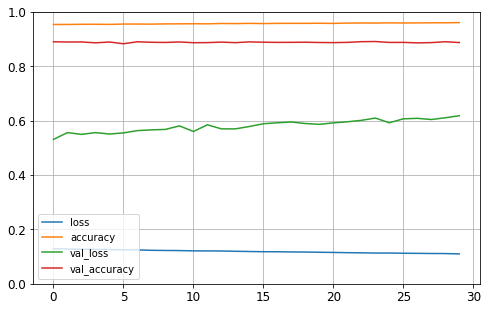

In [ ]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.6460 - accuracy: 0.8814


[0.6459749937057495, 0.8813999891281128]

*2.3) batch-size:25*

In [ ]:
history6 = model.fit(X_train, y_train, batch_size=25, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.1075 - accuracy: 0.9619 - val_loss: 0.6200 - val_accuracy: 0.8884
Epoch 2/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.1064 - accuracy: 0.9629 - val_loss: 0.6267 - val_accuracy: 0.8870
Epoch 3/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.1065 - accuracy: 0.9627 - val_loss: 0.6250 - val_accuracy: 0.8896
Epoch 4/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.1060 - accuracy: 0.9627 - val_loss: 0.6267 - val_accuracy: 0.8888
Epoch 5/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.1053 - accuracy: 0.9631 - val_loss: 0.6238 - val_accuracy: 0.8876
Epoch 6/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.1051 - accuracy: 0.9632 - val_loss: 0.6312 - val_accuracy: 0.8886
Epoch 7/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.1045 - accuracy: 0.9632 - val_loss: 0.6266 - val_accuracy:

In [ ]:
history6.params

{'epochs': 30, 'steps': 2200, 'verbose': 1}

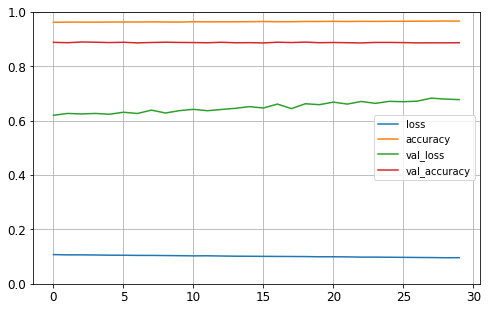

In [ ]:
pd.DataFrame(history6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.7097 - accuracy: 0.8809


[0.7097203731536865, 0.8809000253677368]

*2.4) batch-size:40*

In [ ]:
history7 = model.fit(X_train, y_train, batch_size=40, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1375/1375 [==============================] - 6s 4ms/step - loss: 0.0932 - accuracy: 0.9683 - val_loss: 0.6786 - val_accuracy: 0.8874
Epoch 2/30
1375/1375 [==============================] - 5s 4ms/step - loss: 0.0927 - accuracy: 0.9683 - val_loss: 0.6788 - val_accuracy: 0.8850
Epoch 3/30
1375/1375 [==============================] - 6s 5ms/step - loss: 0.0927 - accuracy: 0.9682 - val_loss: 0.6890 - val_accuracy: 0.8860
Epoch 4/30
1375/1375 [==============================] - 6s 5ms/step - loss: 0.0921 - accuracy: 0.9682 - val_loss: 0.6926 - val_accuracy: 0.8868
Epoch 5/30
1375/1375 [==============================] - 5s 4ms/step - loss: 0.0918 - accuracy: 0.9681 - val_loss: 0.6854 - val_accuracy: 0.8858
Epoch 6/30
1375/1375 [==============================] - 5s 4ms/step - loss: 0.0916 - accuracy: 0.9682 - val_loss: 0.6882 - val_accuracy: 0.8864
Epoch 7/30
1375/1375 [==============================] - 5s 4ms/step - loss: 0.0914 - accuracy: 0.9683 - val_loss: 0.6903 - val_accuracy:

In [ ]:
history7.params

{'epochs': 30, 'steps': 1375, 'verbose': 1}

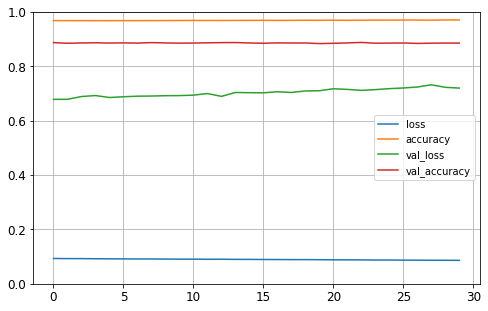

In [ ]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.7520 - accuracy: 0.8803


[0.7519619464874268, 0.880299985408783]

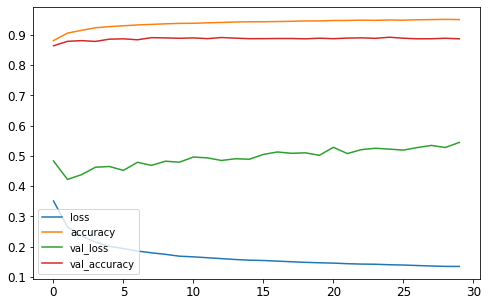

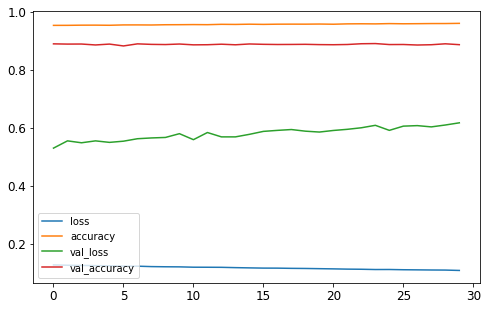

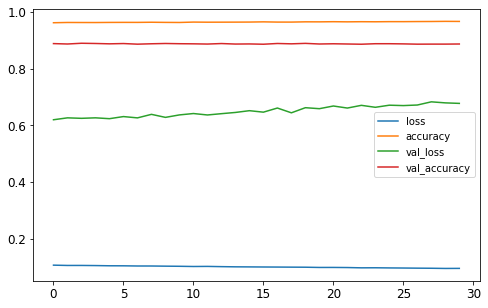

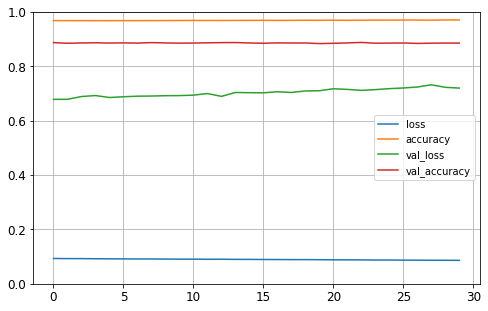

In [ ]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
pd.DataFrame(history5.history).plot(figsize=(8, 5))
pd.DataFrame(history6.history).plot(figsize=(8, 5))
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# **3) Plot Learning curves when using different number of epochs**

*3.1)number of epochs=6*

In [ ]:
history8 = model.fit(X_train, y_train, batch_size=32, epochs=6,
                    validation_data=(X_valid, y_valid))

Epoch 1/6
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0872 - accuracy: 0.9697 - val_loss: 0.7329 - val_accuracy: 0.8880
Epoch 2/6
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0872 - accuracy: 0.9699 - val_loss: 0.7218 - val_accuracy: 0.8850
Epoch 3/6
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0868 - accuracy: 0.9706 - val_loss: 0.7286 - val_accuracy: 0.8846
Epoch 4/6
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0863 - accuracy: 0.9706 - val_loss: 0.7341 - val_accuracy: 0.8874
Epoch 5/6
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0864 - accuracy: 0.9702 - val_loss: 0.7321 - val_accuracy: 0.8864
Epoch 6/6
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0859 - accuracy: 0.9702 - val_loss: 0.7551 - val_accuracy: 0.8860


In [ ]:
history8.params

{'epochs': 6, 'steps': 1719, 'verbose': 1}

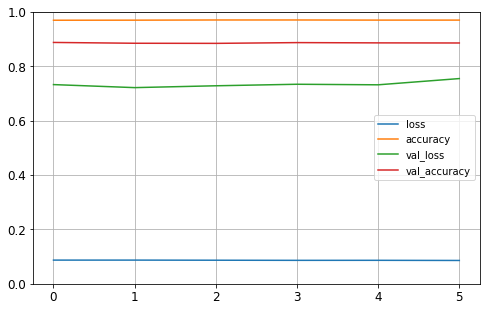

In [ ]:
pd.DataFrame(history8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.7821 - accuracy: 0.8806


[0.7820857167243958, 0.8805999755859375]

*3.2)number of epochs=40*

In [ ]:
history9 = model.fit(X_train, y_train, batch_size=32, epochs=40,
                    validation_data=(X_valid, y_valid))

Epoch 1/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0860 - accuracy: 0.9701 - val_loss: 0.7380 - val_accuracy: 0.8836
Epoch 2/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0856 - accuracy: 0.9712 - val_loss: 0.7424 - val_accuracy: 0.8878
Epoch 3/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0852 - accuracy: 0.9706 - val_loss: 0.7436 - val_accuracy: 0.8878
Epoch 4/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0848 - accuracy: 0.9711 - val_loss: 0.7422 - val_accuracy: 0.8858
Epoch 5/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0849 - accuracy: 0.9712 - val_loss: 0.7463 - val_accuracy: 0.8872
Epoch 6/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0845 - accuracy: 0.9707 - val_loss: 0.7543 - val_accuracy: 0.8868
Epoch 7/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0841 - accuracy: 0.9713 - val_loss: 0.7380 - val_accuracy:

In [ ]:
history9.params

{'epochs': 40, 'steps': 1719, 'verbose': 1}

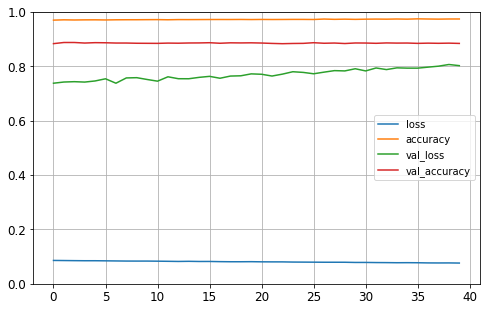

In [ ]:
pd.DataFrame(history9.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.8361 - accuracy: 0.8811


[0.8361045122146606, 0.8810999989509583]

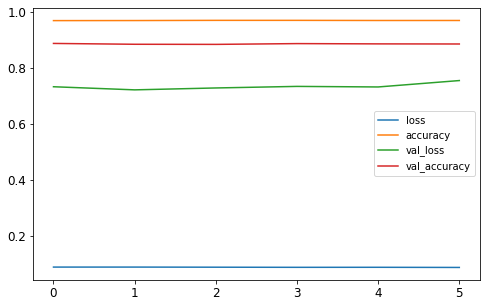

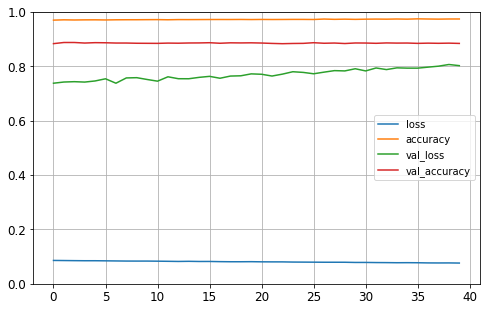

In [ ]:
pd.DataFrame(history8.history).plot(figsize=(8, 5))
pd.DataFrame(history9.history).plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# **4) repeat with more layers**

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(180, activation="softmax"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(150, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(80, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.layers

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history11 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.7136 - accuracy: 0.3403 - val_loss: 0.9670 - val_accuracy: 0.6062
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 1.1014 - accuracy: 0.5592 - val_loss: 0.8212 - val_accuracy: 0.6832
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.9648 - accuracy: 0.6210 - val_loss: 0.7071 - val_accuracy: 0.7234
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8721 - accuracy: 0.6687 - val_loss: 0.6699 - val_accuracy: 0.7532
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8108 - accuracy: 0.6957 - val_loss: 0.6280 - val_accuracy: 0.7644
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7696 - accuracy: 0.7142 - val_loss: 0.6144 - val_accuracy: 0.7526
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7457 - accuracy: 0.7268 - val_loss: 0.6814 - val_accuracy:

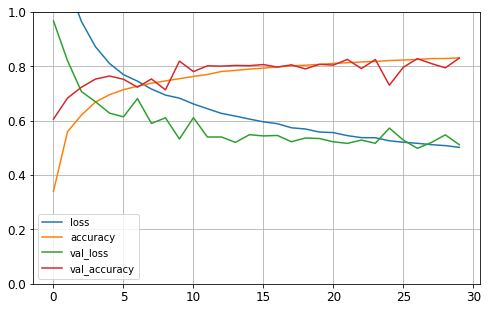

In [ ]:
pd.DataFrame(history11.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.8221


[0.5350481271743774, 0.8220999836921692]